In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data_1 = pd.read_csv('student-mat.csv')
data_2 = pd.read_csv('student-por.csv')
data_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [19]:
data_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [20]:
data = pd.concat([data_1,data_2])
data = data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
data = data.reset_index(drop=True)
print(data.iloc[0])

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
Name: 0, dtype: object


In [21]:
def to_binary(x,str1='yes',str2='no'):
    if(x==str1):
        return 0
    elif(x==str2):
        return 1

In [22]:
data['school_bin'] = data['school'].apply(to_binary,str1='GP',str2='MS')
data['sex_bin'] = data['sex'].apply(to_binary,str1='F',str2='M')
data['address_bin'] = data['address'].apply(to_binary,str1='U',str2='R')
data['famsize_bin'] = data['famsize'].apply(to_binary,str1='GT3',str2='LE3')
data['Pstatus_bin'] = data['Pstatus'].apply(to_binary,str1='A',str2='T')
data['schoolsup_bin'] = data['schoolsup'].apply(to_binary,str1='yes',str2='no')
data['famsup_bin'] = data['famsup'].apply(to_binary,str1='yes',str2='no')
data['paid_bin'] = data['paid'].apply(to_binary,str1='yes',str2='no')
data['activities_bin'] = data['activities'].apply(to_binary,str1='yes',str2='no')
data['nursery_bin'] = data['nursery'].apply(to_binary,str1='yes',str2='no')
data['higher_bin'] = data['higher'].apply(to_binary,str1='yes',str2='no')
data['internet_bin'] = data['internet'].apply(to_binary,str1='yes',str2='no')
data['romantic_bin'] = data['romantic'].apply(to_binary,str1='yes',str2='no')

In [23]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famsize_bin,Pstatus_bin,schoolsup_bin,famsup_bin,paid_bin,activities_bin,nursery_bin,higher_bin,internet_bin,romantic_bin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,1,1,1,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,1,1,0,1,1,1,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,1,0,1,0,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,1,0,0,0,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,0,0,1,0,1,0,0,1,1,0
658,MS,F,18,R,GT3,T,2,2,services,other,...,0,1,1,1,1,1,0,0,0,0
659,MS,F,18,R,LE3,A,1,2,at_home,other,...,1,0,1,1,1,1,0,0,1,0
660,MS,F,19,R,GT3,T,1,1,at_home,other,...,0,1,1,0,1,1,0,0,0,0


In [24]:
data.iloc[1]

school                 GP
sex                     F
age                    17
address                 U
famsize               GT3
Pstatus                 T
Medu                    1
Fedu                    1
Mjob              at_home
Fjob                other
reason             course
guardian           father
traveltime              1
studytime               2
failures                0
schoolsup              no
famsup                yes
paid                   no
activities             no
nursery                no
higher                yes
internet              yes
romantic               no
famrel                  5
freetime                3
goout                   3
Dalc                    1
Walc                    1
health                  3
absences                4
G1                      5
G2                      5
G3                      6
school_bin              0
sex_bin                 0
address_bin             0
famsize_bin             0
Pstatus_bin             1
schoolsup_bi

In [29]:
map_job = {'teacher':0,'health':1,'services':2,'at_home':3,'other':4}
map_reason = {'home':0, 'reputation':1,'course':2,'other':3}
map_guardian = {'mother':0,'father':1,'other':2}
data['Mjob_numeric']=data[['Mjob']].applymap(map_job.get)
data['Fjob_numeric']=data[['Fjob']].applymap(map_job.get)
data['reason_numeric']=data[['reason']].applymap(map_reason.get)
data['guardian_numeric']=data[['guardian']].applymap(map_guardian.get)
data['G'] = data['G1']+data['G2']+data['G3']
data['Alc'] = data['Dalc']*5+data['Walc']*2-7
print(data.columns)
data

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_bin', 'sex_bin',
       'address_bin', 'famsize_bin', 'Pstatus_bin', 'schoolsup_bin',
       'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin',
       'internet_bin', 'romantic_bin', 'Mjob_numeric', 'Fjob_numeric',
       'reason_numeric', 'guardian_numeric', 'G', 'Alc'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery_bin,higher_bin,internet_bin,romantic_bin,Mjob_numeric,Fjob_numeric,reason_numeric,guardian_numeric,G,Alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,1,1,3,0,2,0,17,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,0,1,3,4,2,1,16,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,0,0,1,3,4,3,0,25,9
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,0,1,2,0,0,44,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,1,1,4,4,0,1,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,0,1,1,0,3,3,2,2,8,6
658,MS,F,18,R,GT3,T,2,2,services,other,...,0,0,0,0,2,4,0,0,43,0
659,MS,F,18,R,LE3,A,1,2,at_home,other,...,0,0,1,0,3,4,2,0,46,6
660,MS,F,19,R,GT3,T,1,1,at_home,other,...,0,0,0,0,3,4,2,2,24,0


In [61]:
x = data[['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime',
     'goout','health','absences','school_bin','sex_bin','address_bin','famsize_bin',
     'Pstatus_bin','schoolsup_bin','famsup_bin','paid_bin','activities_bin','nursery_bin',
     'higher_bin','internet_bin','romantic_bin','Mjob_numeric','Fjob_numeric','reason_numeric',
     'guardian_numeric','G']]
y = data[['Alc']]

In [84]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
cv = KFold(5, shuffle=True, random_state=0)
test = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=cv)
print(np.mean(-test))

33.41740632297293


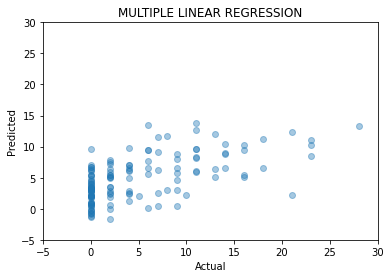

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.xlim(-5,30)
plt.ylim(-5,30)
plt.savefig('pred_1.png')
plt.show()

In [40]:
TSS = np.sum((y-np.mean(y)) ** 2)
print(TSS)

Alc    28360.918429
dtype: float64


In [44]:
p =len(x.columns)
n = len(x.index)

29 662


In [45]:
model.coef_

array([[ 0.25570239, -0.2324143 ,  0.00725877,  0.24917621, -0.60075118,
        -0.21713368, -0.88328201, -0.09014472,  1.80075845,  0.33386616,
         0.12246863,  0.93140989,  3.98340363,  0.54317367,  1.08998365,
         0.73972189, -0.3169336 ,  0.13169073, -1.51659758,  0.28080588,
         1.07720521,  0.76940957, -0.31212799, -0.24907837, -0.08602966,
        -0.23058314,  0.12166065,  0.48022276, -0.03259197]])

In [46]:
np.argmin(np.abs(model.coef_))

2

In [82]:
def aic(n,p,RSS):
    return n*math.log(RSS/n) + 2*p
AIC = []
p_arr = []
data_array = []
x_new = x
p =len(x.columns)
for _ in range(28):
    x_new_train, x_new_test, y_train, y_test = train_test_split(x_new, y, train_size=0.8, test_size=0.2,random_state = 0)
    model.fit(x_new_train,y_train)
    y_pred = model.predict(x_new_test)
    RSS = np.sum((y_test - y_pred) ** 2)
    AIC.append(aic(n,p,RSS))
    p_arr.append(p)
    data_array.append([x_new_train,x_new_test,y_train,y_test])
    x_new = x_new.drop(x_new.columns[[np.argmin(np.abs(model.coef_))]],axis='columns')
    print(x_new.columns)
    p = p-1
print(AIC)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'school_bin', 'sex_bin',
       'address_bin', 'famsize_bin', 'Pstatus_bin', 'schoolsup_bin',
       'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin',
       'internet_bin', 'Mjob_numeric', 'Fjob_numeric', 'reason_numeric',
       'guardian_numeric', 'G'],
      dtype='object')
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'school_bin', 'sex_bin',
       'address_bin', 'famsize_bin', 'Pstatus_bin', 'schoolsup_bin',
       'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin',
       'internet_bin', 'Mjob_numeric', 'Fjob_numeric', 'reason_numeric',
       'guardian_numeric'],
      dtype='object')
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'school_bin', 

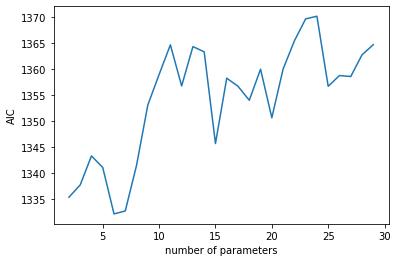

In [80]:
plt.plot(p_arr,AIC)
plt.xlabel("number of parameters")
plt.ylabel("AIC")
plt.savefig("AIC.png")
plt.show()

In [81]:
print(p_arr[np.argmin(AIC)])

6


33.40387386938356


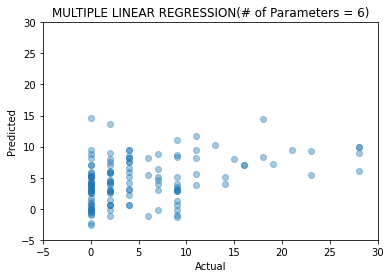

In [95]:
x_final = data[['famrel','goout','school_bin','sex_bin','paid_bin','nursery_bin']]
y_final = data[['Alc']]
model = LinearRegression()
cv = KFold(5, shuffle=True, random_state=0)
test = cross_val_score(model, x_final, y_final, scoring="neg_mean_squared_error", cv=cv)
print(np.mean(-test))

x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(x_final, y_final, train_size=0.8, test_size=0.2)
model.fit(x_train_final,y_train_final)
y_pred_final = model.predict(x_test_final)

plt.scatter(y_test_final, y_pred_final, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION(# of Parameters = 6)")
plt.xlim(-5,30)
plt.ylim(-5,30)
plt.savefig('pred_2.png')
plt.show()

In [91]:
x_artificial = data[['G','goout','studytime','Medu','Fedu','famsup_bin','famrel']]
y_artificial = data[['Alc']]
cv = KFold(5, shuffle=True, random_state=0)
test = cross_val_score(model, x_artificial, y_artificial, scoring="neg_mean_squared_error", cv=cv)
print(np.mean(-test))

37.017056938310155


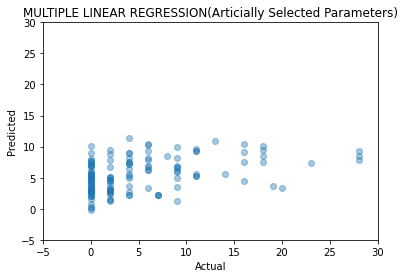

In [96]:
x_train_art, x_test_art, y_train_art, y_test_art = train_test_split(x_artificial, y_artificial, train_size=0.8, test_size=0.2)
model.fit(x_train_art,y_train_art)
y_pred_art = model.predict(x_test_art)

plt.scatter(y_test_art, y_pred_art, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION(Articially Selected Parameters)")
plt.xlim(-5,30)
plt.ylim(-5,30)
plt.savefig('pred_3.png')
plt.show()